In [1]:
import numpy as np
import pandas as pd
import xlrd

import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, ifft, rfft

import glob

def get_fft_set(file_names):
    fft_set = []
    for front in file_names:
        data = pd.read_csv(front)
        fft_data = fft_from_data_frame(data)
        fft_set = fft_data + fft_set
    return fft_set

def fft_from_data_frame(data_frame):
    fs= 114e3
    signal_set = []
    for row in data_frame.values:
        fft_data = fft(row, n=row.size)/row.size
        freq = fftfreq(row.size, d=1/fs)
        cut_high_signal = np.abs(fft_data).copy()
        cut_high_signal[(freq > 50000)] = 0
        cut_high_signal[(freq < 30000)] = 0
        signal_without_0 = list(filter(lambda a: a != 0, cut_high_signal))
        signal_set.append(np.abs(signal_without_0))
    return signal_set

In [2]:
car_front_1 = glob.glob('./Documents/data_set/Result_without_filter/Car/67_Ford_Black_front/*_overall.csv')
car_front_2 = glob.glob('./Documents/data_set/Result_without_filter/Car/99_Fiesta_Purple_front/*_overall.csv')
car_side_1 = glob.glob('./Documents/data_set/Result_without_filter/Car/99_Fiesta_Purple_side/*_overall.csv')
car_side_2 = glob.glob('./Documents/data_set/Result_without_filter/Car/129_Skoda_Grey_side/*_overall.csv')
car_back_1 = glob.glob('./Documents/data_set/Result_without_filter/Car/26_Ford_Black_back/*_overall.csv')
car_back_2 = glob.glob('./Documents/data_set/Result_without_filter/Car/66_Ford_Purple_back/*_overall.csv')

motorbike_1 = glob.glob('./Documents/data_set/Result_without_filter/Motorbike/92_CBF_Honda_side1/*_overall.csv')
motorbike_2 = glob.glob('./Documents/data_set/Result_without_filter/Motorbike/92_CBF_Honda_side2/*_overall.csv')

cycle_1 = glob.glob('./Documents/data_set/Result_without_filter/Cycle/Cycle_1/*_overall.csv')

human_A = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_A/*_overall.csv')
human_B = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_B/*_overall.csv')
human_C = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_C/*_overall.csv')
human_D = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_D/*_overall.csv')
human_E = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_E/*_overall.csv')
human_F = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_F/*_overall.csv')
human_G= glob.glob('./Documents/data_set/Result_without_filter/Human/Human_G/*_overall.csv')
human_H = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_H/*_overall.csv')
human_I = glob.glob('./Documents/data_set/Result_without_filter/Human/Human_I/*_overall.csv')

pillar_1 = glob.glob('./Documents/data_set/Result_without_filter/Pillar/Pillar_1/*_overall.csv')
pillar_2 = glob.glob('./Documents/data_set/Result_without_filter/Pillar/Pillar_2/*_overall.csv')
pillar_3 = glob.glob('./Documents/data_set/Result_without_filter/Pillar/Pillar_3/*_overall.csv')

stopper_1 = glob.glob('./Documents/data_set/Result_without_filter/Stopper/Stopper_1/*_overall.csv')
stopper_2 = glob.glob('./Documents/data_set/Result_without_filter/Stopper/Stopper_2/*_overall.csv')

wall_1 = glob.glob('./Documents/data_set/Result_without_filter/Wall/Wall_1/*_overall.csv')
wall_2 = glob.glob('./Documents/data_set/Result_without_filter/Wall/Wall_2/*_overall.csv')
wall_3 = glob.glob('./Documents/data_set/Result_without_filter/Wall/Wall_3/*_overall.csv')

car_front_1_fft = get_fft_set(car_front_1)
car_front_2_fft = get_fft_set(car_front_2)
car_side_1_fft = get_fft_set(car_side_1)
car_side_2_fft = get_fft_set(car_side_2)
car_back_1_fft = get_fft_set(car_back_1)
car_back_2_fft = get_fft_set(car_back_2)

motorbike_1_fft = get_fft_set(motorbike_1)
motorbike_2_fft = get_fft_set(motorbike_2)

cycle_1_fft = get_fft_set(cycle_1)

human_A_fft = get_fft_set(human_A)
human_B_fft = get_fft_set(human_B)
human_C_fft = get_fft_set(human_C)
human_D_fft = get_fft_set(human_D)
human_E_fft = get_fft_set(human_E)
human_F_fft = get_fft_set(human_F)
human_G_fft = get_fft_set(human_G)
human_H_fft = get_fft_set(human_H)
human_I_fft = get_fft_set(human_I)

pillar_1_fft = get_fft_set(pillar_1)
pillar_2_fft = get_fft_set(pillar_2)
pillar_3_fft = get_fft_set(pillar_3)

stopper_1_fft = get_fft_set(stopper_1)
stopper_2_fft = get_fft_set(stopper_2)

wall_1_fft = get_fft_set(wall_1)
wall_2_fft = get_fft_set(wall_2)
wall_3_fft = get_fft_set(wall_3)

In [5]:
car = car_front_1_fft + car_front_2_fft + car_side_1_fft + car_side_2_fft + car_back_1_fft + car_back_2_fft
motorbike = motorbike_1_fft + motorbike_2_fft
cycle = cycle_1_fft
human = human_A_fft + human_B_fft + human_C_fft + human_D_fft + human_E_fft + human_F_fft + human_G_fft + human_H_fft + human_I_fft
pillar = pillar_1_fft + pillar_2_fft + pillar_3_fft
concrete = stopper_1_fft + stopper_2_fft
wall = wall_1_fft + wall_2_fft + wall_3_fft
 
X = car + motorbike + cycle + human + pillar + concrete + wall
y = len(car)*['Car'] + len(motorbike)*['Motorbike'] + len(cycle)*['Cycle'] + len(human)*['Human'] + len(pillar)*['Pillar'] + len(concrete)*['Concrete'] + len(wall)*['Wall']

print("Car: ",len(car))
print("Motorbike: ",len(motorbike))
print("Cycle: ",len(cycle))
print("Human: ",len(human))
print("Pillar: ",len(pillar))
print("Concrete: ",len(concrete))
print("Wall: ",len(wall))
result = len(car) + len(motorbike) + len(cycle) + len(human) + len(pillar) + len(concrete) + len(wall)
print("Total data:", np.array(X).shape)

Car:  11234
Motorbike:  2122
Cycle:  294
Human:  5124
Pillar:  9362
Concrete:  2372
Wall:  5034
Total data: (35542, 90)


In [6]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt  

def plot_confusionMatrix(y_test, result, labels = ['CAR', 'MOTORBIKE', 'CYCLE', 'HUMAN', 'PILLAR', 'CONCRETE', 'WALL']):
    cm = confusion_matrix(y_test, result)
    print(cm)
    recall_set = []
    cm_overall = []
    F1_SCORE_Overall = 0
    for index, value in enumerate(labels):
#         print(index, labels[index])
        precision = round(precision_score(y_test, result, average='micro',labels=labels[index]),2)
        recall = round(recall_score(y_test, result, average='micro',labels=labels[index]),2)
        F1_SCORE = round(f1_score(y_test, result, average='micro',labels=labels[index]),2)
        print(value,"precision:", precision)
        
        recall_set.append(recall)
        cm_overall.append(np.append(cm[index], precision))
        
    score = accuracy_score(result, y_test)
    cm_overall.append(np.append(recall_set, score))
#     print(recall_set, cm_overall) 
    sum = np.sum(cm, axis=1)
    cm = cm_overall   
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=True, ax = ax,linewidths=.5,fmt='g',cmap="Greens"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    counter = 0
    for i in range(0,7):
        for j in range(0,8):
            percentage = cm[i][j]/sum[i]
            t = ax.texts[counter]
            if j == 7:
                t.set_text(str(cm[i][j]))
            else:
                t.set_text(str(cm[i][j]) + '\n' + str(round(percentage*100,2)) + " %")
            counter = counter + 1
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

print('X train data : ', np.array(X_train).shape)
print('X test data : ', np.array(X_test).shape)
print('y train data : ', np.array(y_train).shape)
print('y test data : ', np.array(y_test).shape)

X train data :  (21325, 90)
X test data :  (14217, 90)
y train data :  (21325,)
y test data :  (14217,)


In [9]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

Accuracy: 0.9035661531968769
[[4436   10    0   59    0   21    0]
 [  79  768    0   67    0   13    4]
 [   7   13   11   90    0    1    0]
 [ 292   60    1 1617    6   36    5]
 [ 185    4    0   48  521   61   33]
 [  29   52    0   11    0 3596   15]
 [  49   16    0   11    0   93 1897]]
CAR precision: 0.87
MOTORBIKE precision: 0.9
CYCLE precision: 0.86
HUMAN precision: 0.86
PILLAR precision: 0.87
CONCRETE precision: 0.9
WALL precision: 0.87


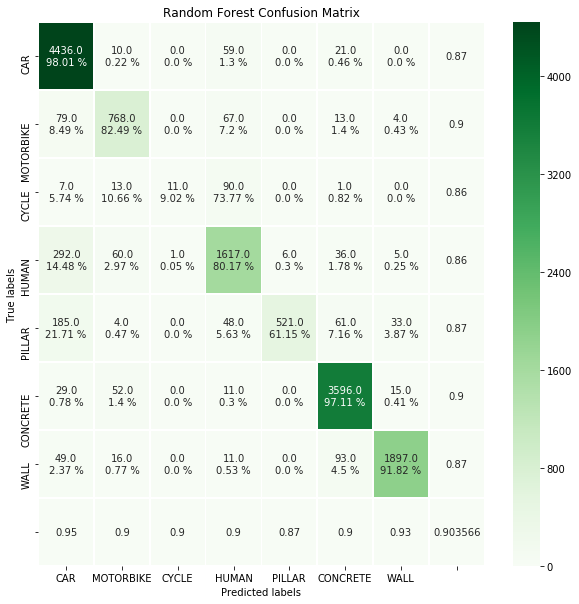

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(normalized_X_train, y_train)
result = clf.predict(normalized_X_test)

title = ('Random Forest Confusion Matrix')
print("Accuracy:", accuracy_score(y_test, result))
plot_confusionMatrix(y_test, result)

Accuracy: 0.9606105366814377
[[4477    0    0   49    0    0    0]
 [   4  904    1    5    1    9    7]
 [   1    7  101    9    1    2    1]
 [ 125   36   13 1655   14  124   50]
 [  17    6    1   18  785   15   10]
 [   0    1    0    0    0 3692   10]
 [   0    0    1    1    0   21 2043]]
CAR precision: 0.96
MOTORBIKE precision: 0.96
CYCLE precision: 0.96
HUMAN precision: 0.96
PILLAR precision: 0.96
CONCRETE precision: 0.96
WALL precision: 0.96


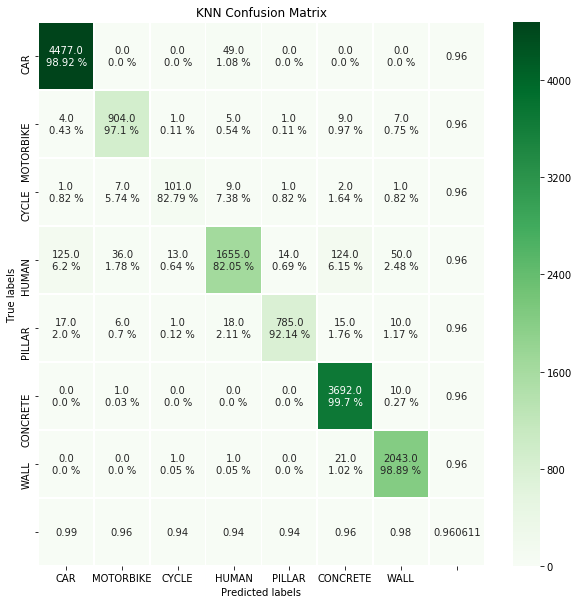

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(normalized_X_train,y_train)
# print('\nThe number of neighbors used to predict the target : ',clf.n_neighbors)
result = knn.predict(normalized_X_test)

title = ('KNN Confusion Matrix')
# print(confusion_matrix(y_test, result)) 
print("Accuracy:", accuracy_score(y_test, result))
plot_confusionMatrix(y_test, result)

In [9]:
# k_range = range(1, 26)

# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(normalized_X_train, y_train)
#     result = knn.predict(normalized_X_test)
#     scores = accuracy_score(y_test, result)
#     print(scores)

In [10]:
np.array(pillar_1_fft).shape

(5838, 90)

In [11]:
len(pillar_1_fft[0])

90

In [12]:
# from sklearn.model_selection import cross_val_score

# for i in range(1,26):
#     clf = KNeighborsClassifier(i)
#     scores = cross_val_score(clf, normalized_X_train, y_train, cv=4, scoring="accuracy")
#     print("k = ", i, "score average", scores.mean())